objective 1

In [1]:
import pandas as pd
data = pd.read_csv('data3.csv')
data.index=range(1,242)
data

,Countries,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,Afghanistan,1.72,1.86,1.38,1.35,1.15,1.28,1.43,1.48,2.17,2.63,2.79,3.76,2.96,2.38,2.15,2.23,1.94,1.93
2,Africa,7.07,6.98,6.73,6.73,6.71,6.55,6.38,6.23,6.17,6.07,5.93,6.10,5.87,5.76,5.86,5.63,5.65,5.65
3,Albania,4.47,4.20,4.43,4.11,4.28,4.06,3.74,3.37,3.25,3.22,3.08,3.14,2.78,3.20,3.16,2.90,2.89,2.91
4,Algeria,3.55,3.45,3.50,3.47,3.37,3.31,3.49,3.58,3.54,3.81,3.61,3.66,3.89,3.92,4.11,4.15,3.98,4.05
5,Americas,6.51,6.37,6.36,6.27,6.16,6.00,5.81,5.74,5.60,5.51,5.48,5.33,5.19,5.17,5.12,4.98,4.90,4.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Western Europe,4.72,4.78,4.70,4.77,4.72,4.65,4.53,4.26,4.25,4.22,4.29,4.00,3.98,4.01,3.78,3.76,3.70,3.63
238,World,6.59,6.49,6.44,6.43,6.38,6.26,6.12,5.97,5.87,5.85,5.87,5.73,5.63,5.51,5.40,5.24,5.10,5.01
239,Yemen,2.86,3.05,2.84,3.05,3.20,3.22,3.35,3.17,3.22,3.44,3.09,3.01,2.66,3.49,3.08,1.87,1.89,2.04
240,Zambia,11.88,11.68,11.60,11.26,10.88,10.53,10.04,9.33,9.00,8.49,8.04,8.05,7.90,7.80,7.77,7.79,7.72,8.05


In [2]:
mean_year=pd.Series(data[1:].mean())
mean_year

2000    6.970802
2001    6.886371
2002    6.776513
2003    6.748319
2004    6.623613
2005    6.436778
2006    6.279916
2007    6.105063
2008    5.952887
2009    5.886067
2010    5.818619
2011    5.745272
2012    5.619833
2013    5.485083
2014    5.406833
2015    5.294792
2016    5.218750
2017    5.135607
dtype: float64

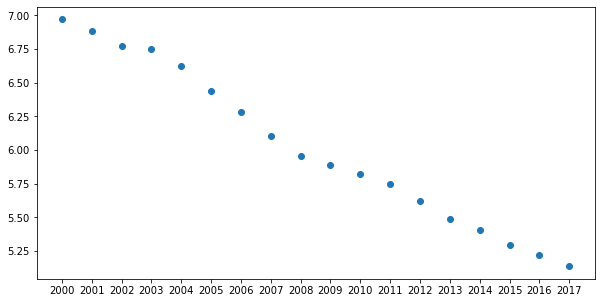

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(mean_year.index,mean_year)
plt.show()

In [4]:
table=pd.DataFrame(mean_year)
table.columns=['Mean (Y)']

In [5]:
table['X']=range(1,19)
table['XY']=table['Mean (Y)']*table['X']
table['X^2']=table['X']**2
table=pd.DataFrame(table)

In [6]:
sum=pd.DataFrame(table.sum())
sum.columns=['Sigma']
sum

mean=pd.DataFrame(table.mean())
mean.columns=['Mean']
mean

,Mean
Mean (Y),6.021729
X,9.500000
XY,54.156532
X^2,117.166667


In [7]:
table=pd.concat([table,sum.T,mean.T])
table

,Mean (Y),X,XY,X^2
2000,6.970802,1.0,6.970802,1.000000
2001,6.886371,2.0,13.772743,4.000000
2002,6.776513,3.0,20.329538,9.000000
2003,6.748319,4.0,26.993277,16.000000
2004,6.623613,5.0,33.118067,25.000000
2005,6.436778,6.0,38.620669,36.000000
2006,6.279916,7.0,43.959414,49.000000
2007,6.105063,8.0,48.840502,64.000000
2008,5.952887,9.0,53.575983,81.000000
2009,5.886067,10.0,58.860669,100.000000


In [8]:
numerator=table['XY'].loc['Sigma']-table['X'].loc['Sigma']*table['Mean (Y)'].loc['Sigma']/20
numerator

48.07350808298247

In [9]:
denominator=table['X^2'].loc['Sigma']-table['X'].loc['Sigma']**2/20
denominator

646.95

In [10]:
b=numerator/denominator
b

0.07430791882368416

In [11]:
def eq_regression(x):
    y=table['Mean (Y)'].loc['Mean']+b*(x-table['X'].loc['Mean'])
    return(y)

estimated megajoules per constant 2011 purchasing power parity GDP next 11 years [6.876269913451225, 6.950577832274909, 7.024885751098593, 7.099193669922277, 7.173501588745962, 7.247809507569646, 7.32211742639333, 7.396425345217015, 7.470733264040699, 7.545041182864383, 7.619349101688067, 7.6936570205117505]


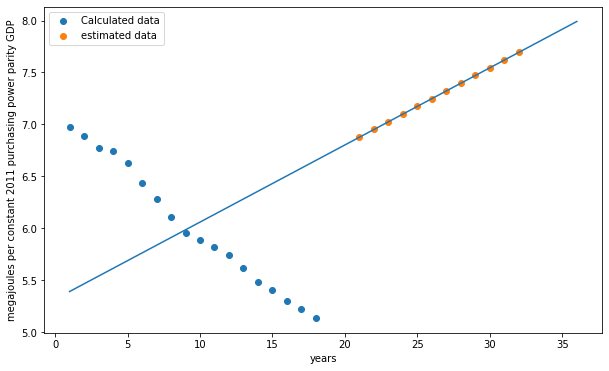

In [20]:
plt.figure(figsize=(10,6))
x_values=[]
y_values=[]
for x in range(21,33):
    x_values.append(x)
    y_values.append(eq_regression(x))
    
print("estimated megajoules per constant 2011 purchasing power parity GDP next 11 years",y_values)

aabbccdd=[]
for i in mean_year.index:
    aabbccdd.append(int(i)-1999)
plt.scatter(aabbccdd,mean_year,label='Calculated data')
plt.scatter([range(21,33)],y_values,label='estimated data')
plt.legend()

y_line=[]
x_line=[]
for x in range(1,37):
    x_line.append(x)
    y_line.append(eq_regression(x))
plt.plot(x_line,y_line)
plt.xlabel("years")
plt.ylabel("megajoules per constant 2011 purchasing power parity GDP")
plt.show()